# Assignment 3: End-to-End Machine Learning Project
The material in this assignment is based on Chapter 2 of Hands-On Machine Learning with Scikit-Learn and TensorFlow, by Aurelieln Geron.

# What problem are we trying to solve and how will we solve it?
In our case, we will be trying to build a model of California housing prices using Census data.   The primary goal: be able to predict the median housing price in any California district, using the data available in this dataset.  This problem is an example of **regression**, where the prediction of our model (or its output) is a continuous variable. This is in contrast to **classification**, where the prediction of our model (or its output) is a class or group.

The typical steps in such an analysis vary depending on the problem, but they usually include the following:
1.  Get the data.
2.  Minimally clean and prepare the data.
3.  Explore the data, typically using visualizations.
4.  Select a model appropriate for your particular problem and train it.
5.  Test the model using unseen data.
6.  Fine tune the model.
7.  Present the results.

We will go through all of these steps.  We won't dwell on the details of the model - we will use it like a **black box**.   Later on in the course, we will spend more time on the details.

# 1) Get the data

In [2]:
import pandas as pd

# Now let's print some data to the screem
#housing = pd.read_csv("/fs/scratch/PAS1585/ch2/housing.csv")
housing = pd.read_csv("/home/wayne/main/git/data/ch2/housing.csv")
print("Housing columns:",list(housing.columns))

Housing columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

In [7]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [9]:
corr = housing.corr()
corr.style.background_gradient().set_precision(3)

Our goal in this assignment: predict the **median_house_value** given all of the other data.   "median_house_value" will be our label.  All of the other columns are our **features**.

#2) Explore the data

As we did in chapter 1, we are going to want to explore the data.

1.  Look at a few rows of the dataset: use housing.head().
2.  Get some info about the names and types of the columns in the dataframe, the number of rows, and how much memory the dataframe takes up: using housing.info()
3.  Get some basic statistical info about the dataframe (mean, std, etc): use housing.describe()
4.  Get correlations among all of the columns: use housing.corr()

#3) Feature Engineering:

Feature engineering refers to combining existing features to form new ones. These combination might be simple (like the result of adding/subracting/multiplying/etc) or they could be more complex - like the results of a sophisticated analysis. The basic idea is to add information for each candidate data point, which will hopefully improve whatever model we end up using to perform our predictions.

In our case there are some obvious new features we can create.

1.  rooms_per_househoud
2.  bedrooms/househoud
3.  bedrooms/room
4.  people per househoud

Think about the startified sampling that we did earlier, and note that by far the most correlated variable in our dataset in **median_income**.   So when we split our data we would like to know for sure that our test sample is close in distribution to the median income of our train sample.   Will this be true if we just randomly split the data?   Wel aready know that the answer is "not quite".

To test this, let's make a **categorical** vaiable which describes median income.   We will have 5 categories, running from 1.0 (low) to 5.0 (high).

In [17]:
import numpy as np

housing['income_cat'] = np.ceil(housing['median_income'] /1.5)
housing['income_cat'].where(housing['income_cat']<5.0,5.0,inplace=True)
# adding rooms_per_household (RPH)
housing['RPH'] = housing['total_rooms']/housing['households']

# adding bedrooms_per_household (BPH)
housing['BPH'] = housing['total_bedrooms']/housing['households']
# adding bedrooms_per_romm (BPR)
housing['BPR'] = housing['total_bedrooms']/housing['total_rooms']
# adding people_per_household (PPH)
housing['PPH'] = housing['population']/housing['households']

print(housing.head(20))
housing.head(20)

    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -122.23     37.88                41.0        880.0           129.0   
1     -122.22     37.86                21.0       7099.0          1106.0   
2     -122.24     37.85                52.0       1467.0           190.0   
3     -122.25     37.85                52.0       1274.0           235.0   
4     -122.25     37.85                52.0       1627.0           280.0   
5     -122.25     37.85                52.0        919.0           213.0   
6     -122.25     37.84                52.0       2535.0           489.0   
7     -122.25     37.84                52.0       3104.0           687.0   
8     -122.26     37.84                42.0       2555.0           665.0   
9     -122.25     37.84                52.0       3549.0           707.0   
10    -122.26     37.85                52.0       2202.0           434.0   
11    -122.26     37.85                52.0       3503.0           752.0   
12    -122.2

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -122.23     37.88                41.0        880.0           129.0   
1     -122.22     37.86                21.0       7099.0          1106.0   
2     -122.24     37.85                52.0       1467.0           190.0   
3     -122.25     37.85                52.0       1274.0           235.0   
4     -122.25     37.85                52.0       1627.0           280.0   
5     -122.25     37.85                52.0        919.0           213.0   
6     -122.25     37.84                52.0       2535.0           489.0   
7     -122.25     37.84                52.0       3104.0           687.0   
8     -122.26     37.84                42.0       2555.0           665.0   
9     -122.25     37.84                52.0       3549.0           707.0   
10    -122.26     37.85                52.0       2202.0           434.0   
11    -122.26     37.85                52.0       3503.0           752.0   
12    -122.26     37.85                52.0       2491.0           474.0   
13    -122.26     37.84                52.0        696.0           191.0   
14    -122.26     37.85                52.0       2643.0           626.0   
15    -122.26     37.85                50.0       1120.0           283.0   
16    -122.27     37.85                52.0       1966.0           347.0   
17    -122.27     37.85                52.0       1228.0           293.0   
18    -122.26     37.84                50.0       2239.0           455.0   
19    -122.27     37.84                52.0       1503.0           298.0   

    population  households  median_income  median_house_value ocean_proximity  \
0        322.0       126.0         8.3252            452600.0        NEAR BAY   
1       2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2        496.0       177.0         7.2574            352100.0        NEAR BAY   
3        558.0       219.0         5.6431            341300.0        NEAR BAY   
4        565.0       259.0         3.8462            342200.0        NEAR BAY   
5        413.0       193.0         4.0368            269700.0        NEAR BAY   
6       1094.0       514.0         3.6591            299200.0        NEAR BAY   
7       1157.0       647.0         3.1200            241400.0        NEAR BAY   
8       1206.0       595.0         2.0804            226700.0        NEAR BAY   
9       1551.0       714.0         3.6912            261100.0        NEAR BAY   
10       910.0       402.0         3.2031            281500.0        NEAR BAY   
11      1504.0       734.0         3.2705            241800.0        NEAR BAY   
12      1098.0       468.0         3.0750            213500.0        NEAR BAY   
13       345.0       174.0         2.6736            191300.0        NEAR BAY   
14      1212.0       620.0         1.9167            159200.0        NEAR BAY   
15       697.0       264.0         2.1250            140000.0        NEAR BAY   
16       793.0       331.0         2.7750            152500.0        NEAR BAY   
17       648.0       303.0         2.1202            155500.0        NEAR BAY   
18       990.0       419.0         1.9911            158700.0        NEAR BAY   
19       690.0       275.0         2.6033            162900.0        NEAR BAY   

    income_cat       RPH       BPH       BPR       PPH  
0          5.0  6.984127  1.023810  0.146591  2.555556  
1          5.0  6.238137  0.971880  0.155797  2.109842  
2          5.0  8.288136  1.073446  0.129516  2.802260  
3          4.0  5.817352  1.073059  0.184458  2.547945  
4          3.0  6.281853  1.081081  0.172096  2.181467  
5          3.0  4.761658  1.103627  0.231774  2.139896  
6          3.0  4.931907  0.951362  0.192899  2.128405  
7          3.0  4.797527  1.061824  0.221327  1.788253  
8          2.0  4.294118  1.117647  0.260274  2.026891  
9          3.0  4.970588  0.990196  0.199211  2.172269  
10         3.0  5.477612  1.079602  0.197094  2.263682  
11         3.0  4.772

# 4)  Train/Test Splitting
Out goal is to design an algorithm to prediction housing prices.   To test our model, we will want to split our data into two parts:
1.  Training sample: This is the sample we will train our model on.
2.  Testing sample: This is the **unseen** data that we will test our trained model on.  Good performance on this sample will ensure that our model generalizes well.

Use a split of 80% train and 20% test.   You can do a **random split**, but a better split is stratified according to the income category variable we defined above.   No matter what split you end up using, make sure you see how well the test and train sets agree in that variable.



In [18]:
# split housing into 
import plotly.graph_objs as go
from plotly.offline import iplot
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)
    
enable_plotly_in_cell()

from sklearn.model_selection import train_test_split
train_housing, test_housing = train_test_split(housing, test_size=0.2, random_state=66, stratify=housing['income_cat'])

trace1 = go.Histogram(
    x=train_housing['income_cat'],
    opacity=0.75,
    name="Training sample",
    histnorm='probability'
)
trace2 = go.Histogram(
    x=test_housing['income_cat'],
    opacity=0.75,
    name="Testing sample",
    histnorm='probability'
)

data = [trace1, trace2]
layout = go.Layout(bargap=0.2,
    bargroupgap=0.1)
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')

# 5) Dealing with missing data
You could try:
1.  Removing all rows with any missing data
2.  Replacing the missing data with the mean of the column:  **NOTE**: if you do this, you must get the means from the **training** set.    Think about why this is the case.

Pick one!

In [19]:
# dealing with missing data

housing_nulls = housing[housing.isnull().any(axis=1)]
print(housing_nulls.head())
print(housing.loc[290,:])
print()
#housing.fillna(train_housing.mean(), inplace=True)
#print(housing.loc[290,:])

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity, income_cat, RPH, BPH, BPR, PPH]
Index: []
longitude              -122.16
latitude                 37.77
housing_median_age          47
total_rooms               1256
total_bedrooms         536.719
population                 570
households                 218
median_income            4.375
median_house_value      161900
ocean_proximity       NEAR BAY
income_cat                   3
RPH                    5.76147
BPH                    2.46201
BPR                   0.427324
PPH                    2.61468
Name: 290, dtype: object



In [20]:
housing.fillna(train_housing.mean(), inplace=True)# using th mean of training group to fill the missing data
train_housing.fillna(train_housing.mean(), inplace=True)
test_housing.fillna(train_housing.mean(), inplace=True)
print(housing.loc[290,:])

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5434: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



longitude              -122.16
latitude                 37.77
housing_median_age          47
total_rooms               1256
total_bedrooms         536.719
population                 570
households                 218
median_income            4.375
median_house_value      161900
ocean_proximity       NEAR BAY
income_cat                   3
RPH                    5.76147
BPH                    2.46201
BPR                   0.427324
PPH                    2.61468
Name: 290, dtype: object


In [21]:
# test if there is NaN in housing
housing_nulls = housing[housing.isnull().any(axis=1)]
print(housing_nulls.head())

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity, income_cat, RPH, BPH, BPR, PPH]
Index: []


# 6) Feature Scaling
We will use feature scaling as we did with the fligth dataset.  In this case, use **standardization**.   Remember: you need to use the **training** set to **fit** the transformer, and you need to use the **transformer** on **both** the training and test sets.

Remember that we do not use these techniques for **categorical** columns (something different will be done).


In [24]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

#train_housing.hist(bins=50, figsize=(20,15))
#plt.show()

# scale numberical columns with standardization scalor 
from sklearn.preprocessing import StandardScaler
stanScal = StandardScaler()
train_housing_subset = train_housing.drop(['longitude', 'latitude','median_income','median_house_value','ocean_proximity','income_cat'],axis=1)
#
# test NaN again 
#train_housing_subset_nulls = train_housing_subset[train_housing_subset.isnull().any(axis=1)]
#print(train_housing_subset_nulls.head())

stanScal.fit(train_housing_subset)
train_housing_subset_stanScaled = stanScal.transform(train_housing_subset)
#train_housing_subset_stanScaled = np.delete(train_housing_subset_stanScaled,5, axis=1)

test_housing_subset = test_housing.drop(['longitude', 'latitude','median_income','median_house_value','ocean_proximity','income_cat'],axis=1)
test_housing_subset_stanScaled = stanScal.transform(test_housing_subset)
#test_housing_subset_stanScaled = np.delete(test_housing_subset_stanScaled,5,axis=1)

#,'median_house_value'
# one-hot-encoding categorical variables
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
columnsToEncode_1 = 'income_cat'
onehot_encoder.fit(train_housing[[columnsToEncode_1]])
train_housing_cat_1_one_hot = onehot_encoder.transform(train_housing[[columnsToEncode_1]])


print("Transformed training data", type(train_housing_cat_1_one_hot))
for i in range(10):
    print(train_housing.iloc[i][columnsToEncode_1], train_housing_cat_1_one_hot[i])

test_housing_cat_1_one_hot = onehot_encoder.transform(test_housing[[columnsToEncode_1]])
print("Transformed testing data", type(test_housing_cat_1_one_hot))
for i in range(10):
    print(test_housing.iloc[i][columnsToEncode_1], test_housing_cat_1_one_hot[i])

columnsToEncode_2 = 'ocean_proximity'
onehot_encoder.fit(train_housing[[columnsToEncode_2]])
train_housing_cat_2_one_hot = onehot_encoder.transform(train_housing[[columnsToEncode_2]])
test_housing_cat_2_one_hot = onehot_encoder.transform(test_housing[[columnsToEncode_2]])
#for i in range(30):
#    print(train_housing.iloc[i][columnsToEncode_2], train_housing_cat_2_one_hot[i])


Transformed training data <class 'numpy.ndarray'>
4.0 [0. 0. 0. 1. 0.]
1.0 [1. 0. 0. 0. 0.]
2.0 [0. 1. 0. 0. 0.]
2.0 [0. 1. 0. 0. 0.]
4.0 [0. 0. 0. 1. 0.]
3.0 [0. 0. 1. 0. 0.]
2.0 [0. 1. 0. 0. 0.]
2.0 [0. 1. 0. 0. 0.]
3.0 [0. 0. 1. 0. 0.]
4.0 [0. 0. 0. 1. 0.]
Transformed testing data <class 'numpy.ndarray'>
3.0 [0. 0. 1. 0. 0.]
2.0 [0. 1. 0. 0. 0.]
3.0 [0. 0. 1. 0. 0.]
3.0 [0. 0. 1. 0. 0.]
3.0 [0. 0. 1. 0. 0.]
3.0 [0. 0. 1. 0. 0.]
4.0 [0. 0. 0. 1. 0.]
1.0 [1. 0. 0. 0. 0.]
3.0 [0. 0. 1. 0. 0.]
5.0 [0. 0. 0. 0. 1.]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [25]:
train_housing_subset

housing_median_age  total_rooms  total_bedrooms  population  \
17307                22.0       2512.0           426.0       919.0   
7424                 48.0        284.0           104.0       422.0   
16264                39.0       1841.0           428.0      1368.0   
5815                 25.0       5980.0          1856.0      5217.0   
18519                30.0       2695.0           424.0      1098.0   
6272                 35.0       1499.0           289.0      1112.0   
16930                52.0        499.0           148.0       318.0   
14899                24.0       1901.0           490.0      1334.0   
4146                 30.0       3369.0           824.0      2032.0   
3922                 35.0        782.0           144.0       425.0   
14609                33.0       5226.0           833.0      2221.0   
2955                 38.0       1472.0           305.0       670.0   
3895                 33.0       3270.0           818.0      2118.0   
16394                29.0       2465.0           327.0       859.0   
16003                35.0       1363.0           302.0      1786.0   
10794                27.0       1797.0           343.0       435.0   
11265                35.0       2356.0           478.0      1659.0   
16239                52.0       2259.0           417.0       766.0   
5998                 30.0       3199.0           591.0      2192.0   
6381                 37.0       3134.0           532.0      1220.0   
10298                11.0       3331.0           410.0      1460.0   
8986                 21.0      11308.0          3039.0      5127.0   
13352                15.0       3942.0           661.0      2240.0   
1711                 25.0       3807.0           806.0      1821.0   
18198                34.0       2600.0           650.0      1994.0   
5162                 32.0        721.0           205.0       842.0   
19547                49.0       2051.0           500.0      1525.0   
7445                 32.0       2210.0           456.0      1270.0   
17352                24.0       2020.0           307.0       855.0   
15622                52.0       2618.0           611.0      1328.0   
...                   ...          ...             ...         ...   
8197                 43.0       2506.0           531.0      1230.0   
7453                 36.0       2447.0           503.0      1532.0   
14192                20.0       2192.0           406.0      1766.0   
16203                48.0       1766.0           444.0      1406.0   
8336                 40.0       1323.0           243.0       684.0   
18708                35.0       2072.0           385.0      1029.0   
10507                 5.0       2840.0           403.0      1363.0   
9994                 10.0       3063.0           497.0      1168.0   
7899                 16.0       2851.0           626.0      1985.0   
13612                33.0       2898.0           503.0      1374.0   
18537                20.0       2502.0           454.0       981.0   
13683                 6.0       2383.0           606.0      1301.0   
5519                 43.0       2700.0           510.0      1146.0   
17119                36.0       1210.0           236.0       981.0   
16054                52.0       3260.0           653.0      1594.0   
7925                 31.0       2906.0           578.0      1806.0   
3117                  9.0       3811.0           605.0      1518.0   
14759                17.0       2803.0           683.0      2768.0   
16198                43.0       1624.0           448.0      1805.0   
4024                 42.0       1611.0           410.0       879.0   
13965                13.0       4760.0           938.0       309.0   
7619                 22.0       7368.0          1367.0      4721.0   
13963                15.0       4419.0           822.0       622.0   
14703                23.0       2698.0           410.0      1094.0   
14941                26.0       2756.0           422.0      1166.0   
11695            

# 7) Combining everything before fitting

Refer to the ealrlier workbook titled "Putting Humpty-Dumpty back together!""

After all of our above work we should have:
1.   two numpy arrays containing our "scaled" numerical features, one for our training sample and one for our testing sample
2.   two one-hot-encoded numpy arrays for our categorical variable, one for our training sample and one for our testing sample

We need to combine these so we have **one** training numpy array, and **one** testing numpy array.   Along with each of these, we will have **label** arrays, made from the median_house_value column for the test and train samples.


In [26]:
train_housing_labels = train_housing['median_house_value'].copy().values
"""
train_housing_labels = train_housing_labels.reshape(len(train_housing_labels), 1)
stanScal.fit(train_housing_labels)
train_housing_labels = stanScal.transform(train_housing_labels)
"""

print("Shape labels:                               ", type(train_housing_labels), train_housing_labels.shape)
print("Shape train_housing_subset_stanScaled:      ", type(train_housing_subset_stanScaled), train_housing_subset_stanScaled.shape)
print("Shape train_housing_cat_1_one_hot:            ", type(train_housing_cat_1_one_hot), train_housing_cat_1_one_hot.shape)
print("Shape train_housing_cat_2_one_hot:            ", type(train_housing_cat_2_one_hot), train_housing_cat_2_one_hot.shape)

train_housing_toFit = np.concatenate([train_housing_subset_stanScaled, train_housing_cat_1_one_hot, train_housing_cat_2_one_hot], axis=1)


test_housing_labels = test_housing['median_house_value'].copy().values
"""
test_housing_labels = test_housing_labels.reshape(len(test_housing_labels), 1)
stanScal.fit(test_housing_labels)
test_housing_labels = stanScal.transform(test_housing_labels)
"""
test_housing_toFit = np.concatenate([test_housing_subset_stanScaled,test_housing_cat_1_one_hot,test_housing_cat_2_one_hot], axis=1)



Shape labels:                                <class 'numpy.ndarray'> (16512,)
Shape train_housing_subset_stanScaled:       <class 'numpy.ndarray'> (16512, 9)
Shape train_housing_cat_1_one_hot:             <class 'numpy.ndarray'> (16512, 5)
Shape train_housing_cat_2_one_hot:             <class 'numpy.ndarray'> (16512, 5)


# 8) Fit the data and test the fit
As before the fit model will be linear regression (we are using more than just a single feature but is it still just linear regression).   Test the fit 

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

# Fitting
train_housing_labels = train_housing_labels.reshape(len(train_housing_labels), 1)
test_housing_labels = test_housing_labels.reshape(len(test_housing_labels), 1)
model.fit(train_housing_toFit, train_housing_labels)
print("Fit results: slope=",model.coef_," and intercept=",model.intercept_)

# predicting
test_housing_labels_pred = model.predict(test_housing_toFit)
train_housing_labels_pred = model.predict(train_housing_toFit)
print("Type returned from predict:",type(test_housing_labels_pred),"; shape: ", test_housing_labels.shape)

# Do this on test AND training set!
#train_housing_labels_pred = train_housing_labels_pred.reshape(len(train_housing_labels_pred),1)
lin_mse = mean_squared_error(test_housing_labels, test_housing_labels_pred)
lin_rmse = np.sqrt(lin_mse)    ## Remember to take the square root!
print("Mean squared error and the root mean square",lin_mse,lin_rmse)



Fit results: slope= [[ 16181.84141582  -5014.49103102   4332.19141563 -46848.79525374
   52833.45832033  29139.71322023 -24510.64383944  19061.43589126
    1743.28192014 -97361.7769469  -73327.62727001 -18616.50070216
   37188.65346381 152117.25145527 -26244.72740344 -96390.56681881
  159935.05265094 -23761.27561295 -13538.48281574]]  and intercept= [263347.35244786]
Type returned from predict: <class 'numpy.ndarray'> ; shape:  (4128, 1)
Mean squared error and the root mean square 5055550108.052152 71102.39171822669


# 9) Some extra stuff

If you are looking for more to do!  1 extra point if you do 2 of them, 2 extra points if you do 3!

1.  If you used random sample for your test/train split, try using instead stratified sampling based on the income category variable.   If you used stratified sampling then try random samplling.   Is one noticably better?

2.   We probably should have done this first.... but how do we *know* that our fit improved our knowledge?   Is there a simple predictor that we could have used instead?   How about if we predict the price simply based on the mean (or the median) of all housing prices?   Use the mean squared error to do this.

3.   Try another predictor from sklearn:  RandomForestRegressor and/or DecisionTreeRegressor.   Make sure you test the fit results (using mean_squared_error) on BOTH the training AND test sets!

4.  **Making maps**
This data is interesting since it has latitude and longitude. Previously we made world maps, but this depended on our data having tags which were country names. This is different. This will be more like a scatter-plot, but arranged on an existing map (primarily California). How do we do this?
Google: plotly map scatter
Take the code from the first example and modify it.


In [28]:
# try random train/test split
train_housing_rdm, test_housing_rdm = train_test_split(housing, test_size=0.2, random_state=66)
train_housing_rdm.fillna(train_housing_rdm.mean(), inplace=True)
test_housing_rdm.fillna(train_housing_rdm.mean(), inplace=True)

train_housing_subset_rdm = train_housing_rdm.drop(['longitude', 'latitude','median_house_value','median_income','ocean_proximity','income_cat'],axis=1)
stanScal.fit(train_housing_subset)
train_housing_subset_stanScaled_rdm = stanScal.transform(train_housing_subset_rdm)

test_housing_subset_rdm = test_housing_rdm.drop(['longitude', 'latitude','median_house_value','median_income','ocean_proximity','income_cat'],axis=1)
test_housing_subset_stanScaled_rdm = stanScal.transform(test_housing_subset_rdm)
columnsToEncode = 'income_cat'
onehot_encoder.fit(train_housing_rdm[[columnsToEncode]])
train_housing_cat_one_hot_rdm = onehot_encoder.transform(train_housing_rdm[[columnsToEncode]])
test_housing_cat_one_hot_rdm = onehot_encoder.transform(test_housing_rdm[[columnsToEncode]])

train_housing_labels_rdm = train_housing_rdm['median_house_value'].copy().values
train_housing_toFit_rdm = np.concatenate([train_housing_subset_stanScaled_rdm, train_housing_cat_one_hot_rdm], axis=1)
test_housing_labels_rdm = test_housing_rdm['median_house_value'].copy().values
test_housing_toFit_rdm = np.concatenate([test_housing_subset_stanScaled_rdm,test_housing_cat_one_hot_rdm], axis=1)

model = LinearRegression()
train_housing_labels_rdm = train_housing_labels_rdm.reshape(len(train_housing_labels_rdm), 1)
test_housing_labels_rdm = test_housing_labels_rdm.reshape(len(test_housing_labels_rdm), 1)
model.fit(train_housing_toFit_rdm, train_housing_labels_rdm)
print("Fit results: slope=",model.coef_," and intercept=",model.intercept_)

test_housing_labels_pred_rdm = model.predict(test_housing_toFit_rdm)
train_housing_labels_pred_rdm = model.predict(train_housing_toFit_rdm)
print("Type returned from predict:",type(test_housing_labels_pred_rdm),"; shape: ", test_housing_labels.shape)

lin_mse = mean_squared_error(test_housing_labels_rdm, test_housing_labels_pred_rdm)
lin_rmse = np.sqrt(lin_mse)    ## Remember to take the square root!
print("Mean squared error and the root mean square",lin_mse,lin_rmse)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5434: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Fit results: slope= [[  25076.73743344  -13914.73779251     253.8424616   -50277.89427612
    69980.92507145   33517.01861193  -33386.03419397   32938.17854552
     -961.21458955 -128059.77974034  -88117.40216456  -17212.08587077
    55328.58163591  178060.68613976]]  and intercept= [215818.1879238]
Type returned from predict: <class 'numpy.ndarray'> ; shape:  (4128, 1)
Mean squared error and the root mean square 6261276088.3610935 79128.2256110997


In [29]:
housing['median_house_value'].median()


179700.0

In [30]:
# using the mean or meadian of all prices
mean_pred_lables = np.ones((4128, 1)) * 179700.0
lin_mse = mean_squared_error(mean_pred_lables, test_housing_labels_pred_rdm)
lin_rmse = np.sqrt(lin_mse) 
print("Mean squared error and the root mean square",lin_mse,lin_rmse)

Mean squared error and the root mean square 8619615542.31781 92841.88463359525


In [31]:
# using RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=3, random_state=0,n_estimators=100)
regr.fit(train_housing_toFit, train_housing_labels)

test_housing_labels_pred = regr.predict(test_housing_toFit)
train_housing_labels_pred = regr.predict(train_housing_toFit)

lin_mse = mean_squared_error(test_housing_labels_rdm, test_housing_labels_pred_rdm)
lin_rmse = np.sqrt(lin_mse)
print("Mean squared error and the root mean square",lin_mse,lin_rmse)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Mean squared error and the root mean square 6261276088.3610935 79128.2256110997


In [32]:
# using DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(train_housing_toFit, train_housing_labels)

test_housing_labels_pred = regressor.predict(test_housing_toFit)
train_housing_labels_pred = regressor.predict(train_housing_toFit)

lin_mse = mean_squared_error(test_housing_labels_rdm, test_housing_labels_pred_rdm)
lin_rmse = np.sqrt(lin_mse)
print("Mean squared error and the root mean square",lin_mse,lin_rmse)

Mean squared error and the root mean square 6261276088.3610935 79128.2256110997


In [37]:
# mapping
#import plotly.plotly as py
import chart_studio.plotly as py
import pandas as pd

scl = [0,"rgb(150,0,90)"],[0.125,"rgb(0, 0, 200)"],[0.25,"rgb(0, 25, 255)"],\
[0.375,"rgb(0, 152, 255)"],[0.5,"rgb(44, 255, 150)"],[0.625,"rgb(151, 255, 0)"],\
[0.75,"rgb(255, 234, 0)"],[0.875,"rgb(255, 111, 0)"],[1,"rgb(255, 0, 0)"]

data = [ dict(
    lat = housing['latitude'],
    lon = housing['longitude'],
    text = housing['median_house_value'].astype(str) + ' dollars',
    marker = dict(
        color = housing['median_house_value'],
        colorscale = scl,
        reversescale = True,
        opacity = 0.7,
        size = 2,
        colorbar = dict(
            thickness = 20,
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            ticklen = 3,
            showticksuffix = "first",
            ticksuffix = " dollars",
            dtick = 0.5
        ),
    ),
    type = 'scattergeo'
) ]

layout = dict(
    geo = dict(
        scope = 'north america',
        #scope= 'CA',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation = dict(
                lon = -100
            )
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title = 'California house price',
)
fig = { 'data':data, 'layout':layout }
iplot(fig)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The colNu

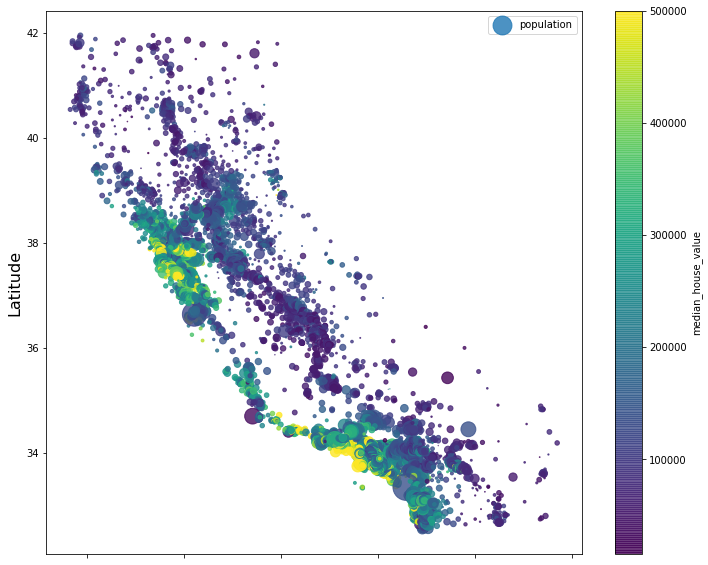

In [10]:
# plot housing data
# each dot is at its longitude and latitude
# the size of the dot is proportional to its population
# the color of the dot represents the median_house_value
df.plot(kind="scatter", x='longitude', y = 'latitude',
       alpha=0.8, s=df['population']/50, label="population",
        figsize=(12,10), c="median_house_value", cmap=plt.get_cmap("viridis"),
        colorbar=True)
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)
plt.show()